In [1]:
# import libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [3]:
salary_train = pd.read_csv("SalaryData_Train.csv")

In [4]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [5]:
salary_test = pd.read_csv("SalaryData_Test.csv")

In [ ]:
salary_train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [ ]:
salary_test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [ ]:
salary_train.shape

(30161, 14)

In [ ]:
salary_test.shape

(15060, 14)

In [ ]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

Data Visualisation

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

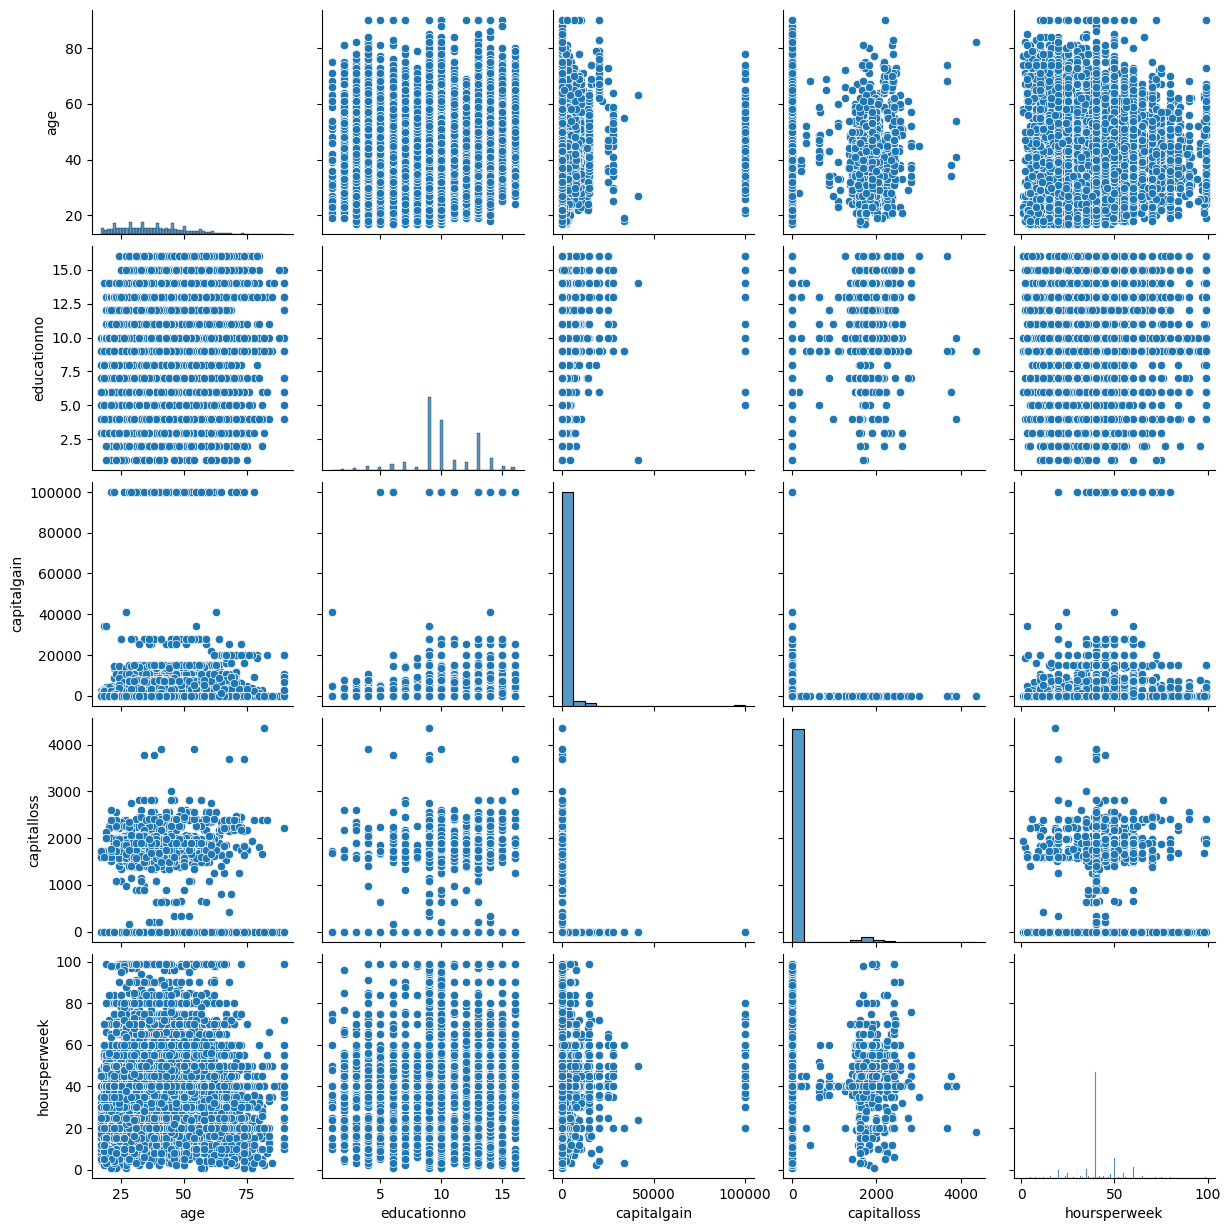

In [12]:
sns.pairplot(salary_train)

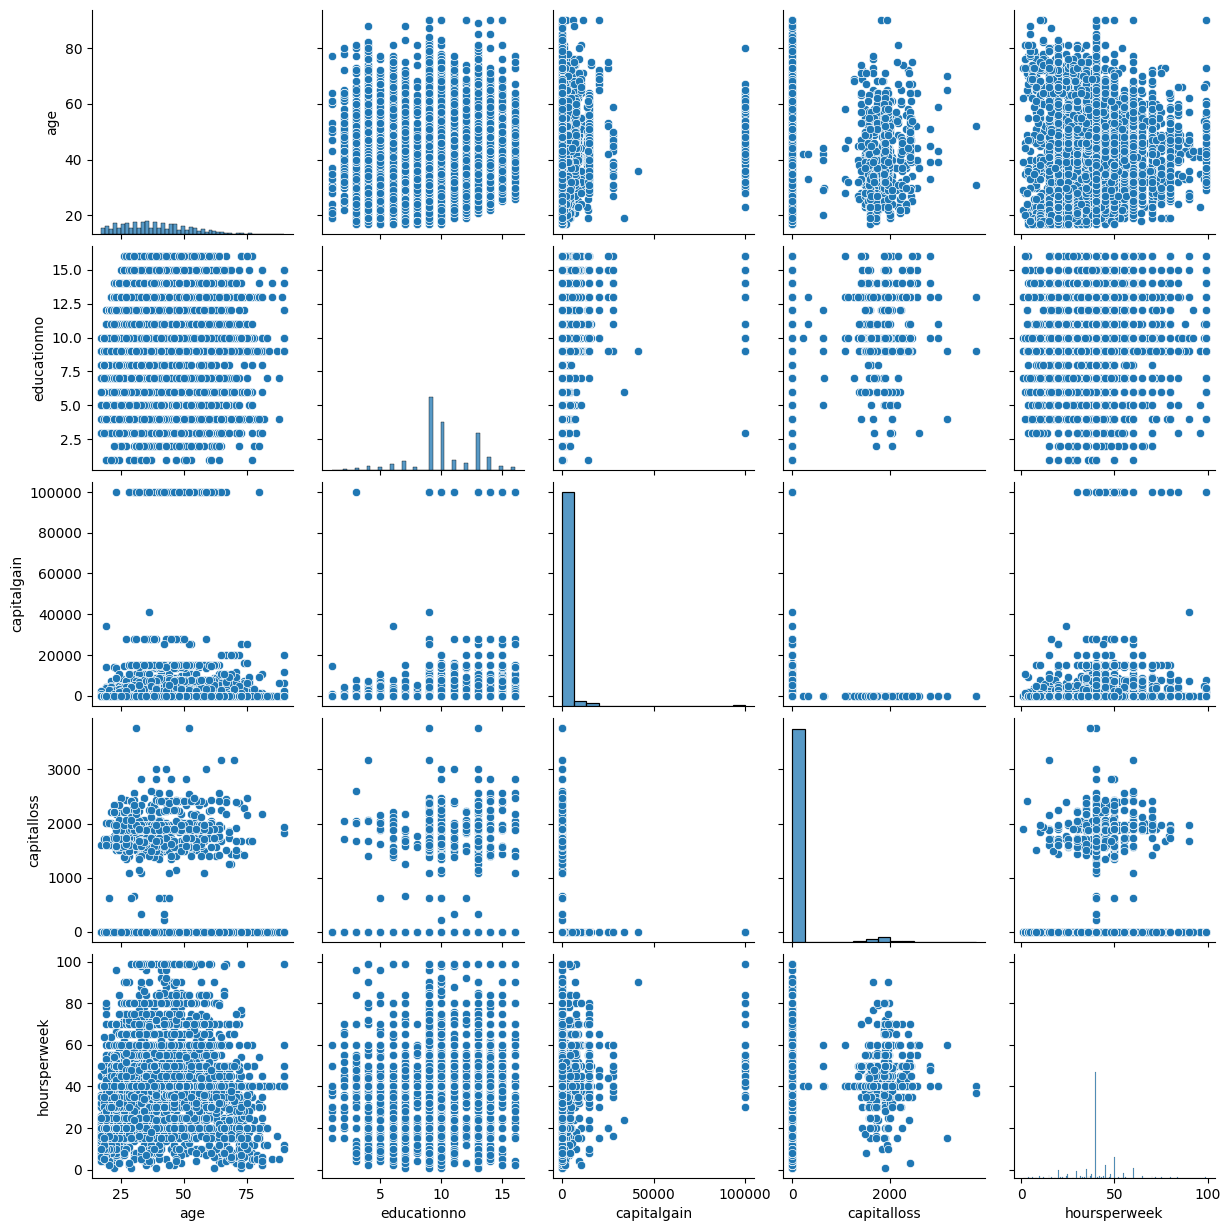

In [13]:
sns.pairplot(salary_test)

<Axes: xlabel='age', ylabel='sex'>

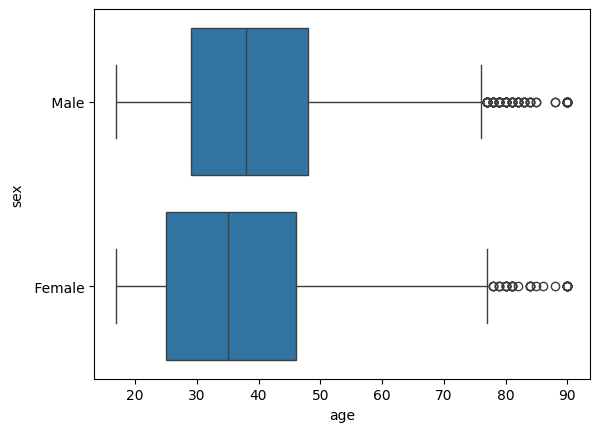

In [14]:
sns.boxplot(x='age',y='sex',data=salary_train)

<Axes: xlabel='age', ylabel='sex'>

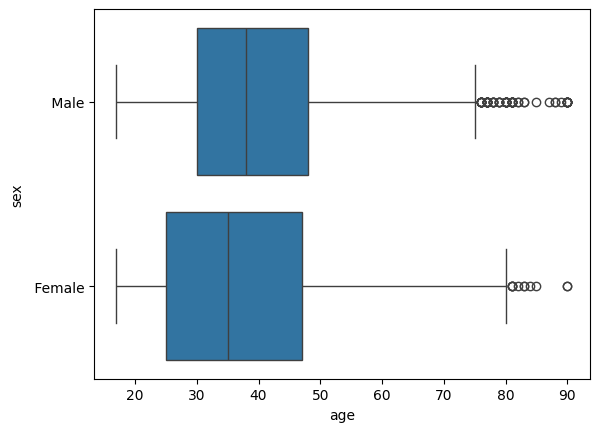

In [15]:
sns.boxplot(x='age',y='sex',data=salary_test)

<Axes: xlabel='Salary', ylabel='capitalgain'>

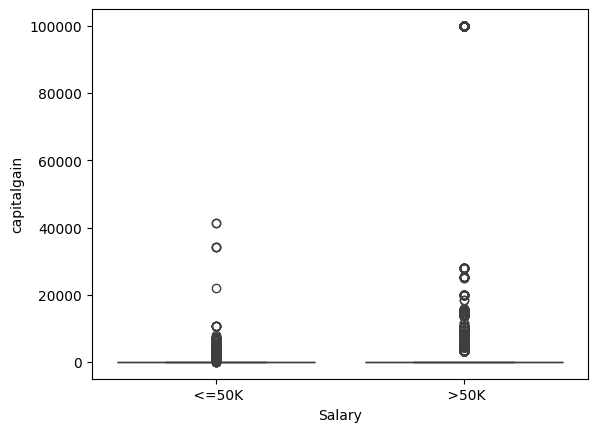

In [19]:
sns.boxplot(x = salary_train['Salary'], y = salary_train['capitalgain'])

<Axes: xlabel='Salary', ylabel='capitalgain'>

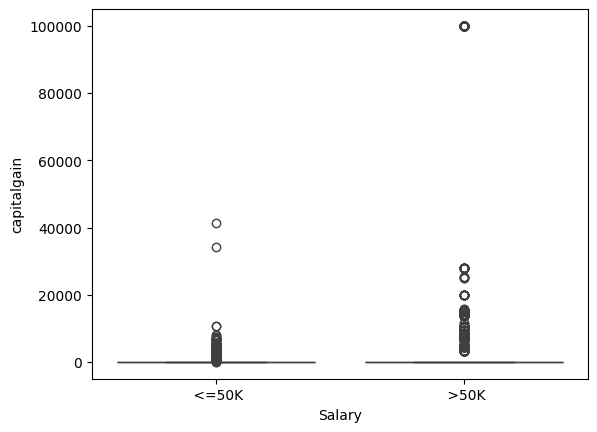

In [20]:
sns.boxplot(x = salary_test['Salary'], y = salary_test['capitalgain'])

<Axes: xlabel='count', ylabel='Salary'>

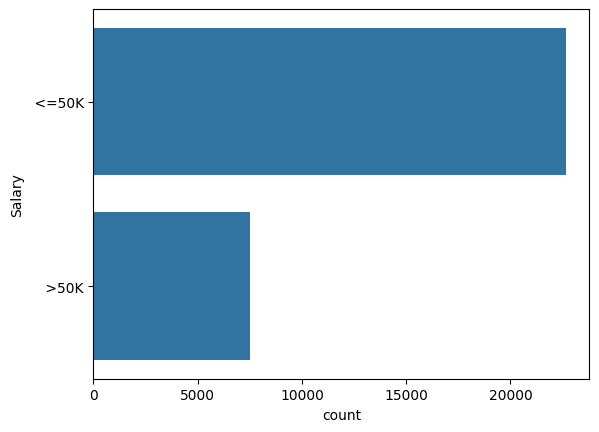

In [23]:
sns.countplot(salary_train['Salary'])

<Axes: xlabel='Salary', ylabel='count'>

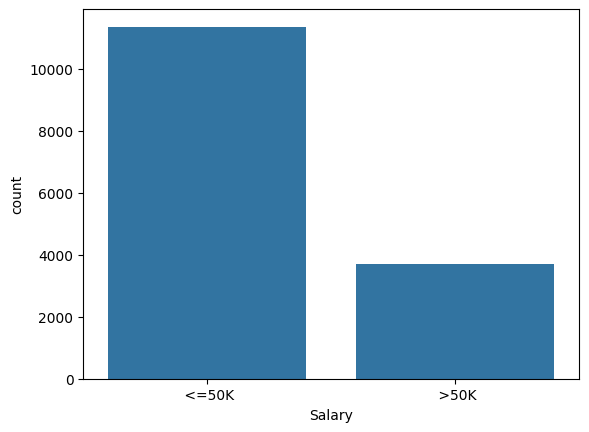

In [24]:
sns.countplot(x = salary_test['Salary'])

<Axes: xlabel='workclass', ylabel='age'>

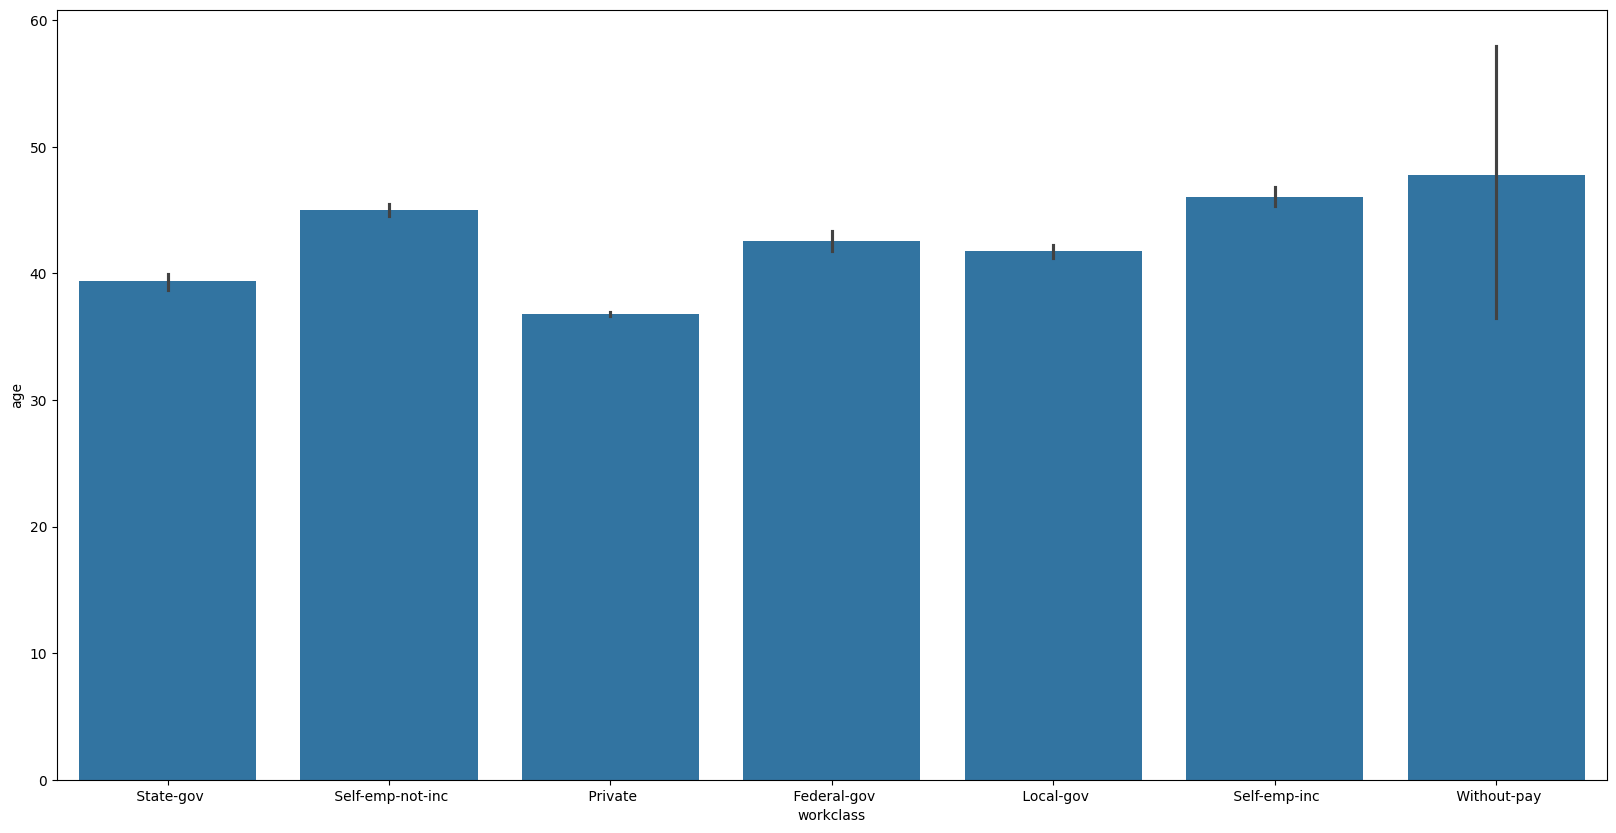

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x='workclass',y='age',data=salary_train)

<Axes: xlabel='workclass', ylabel='age'>

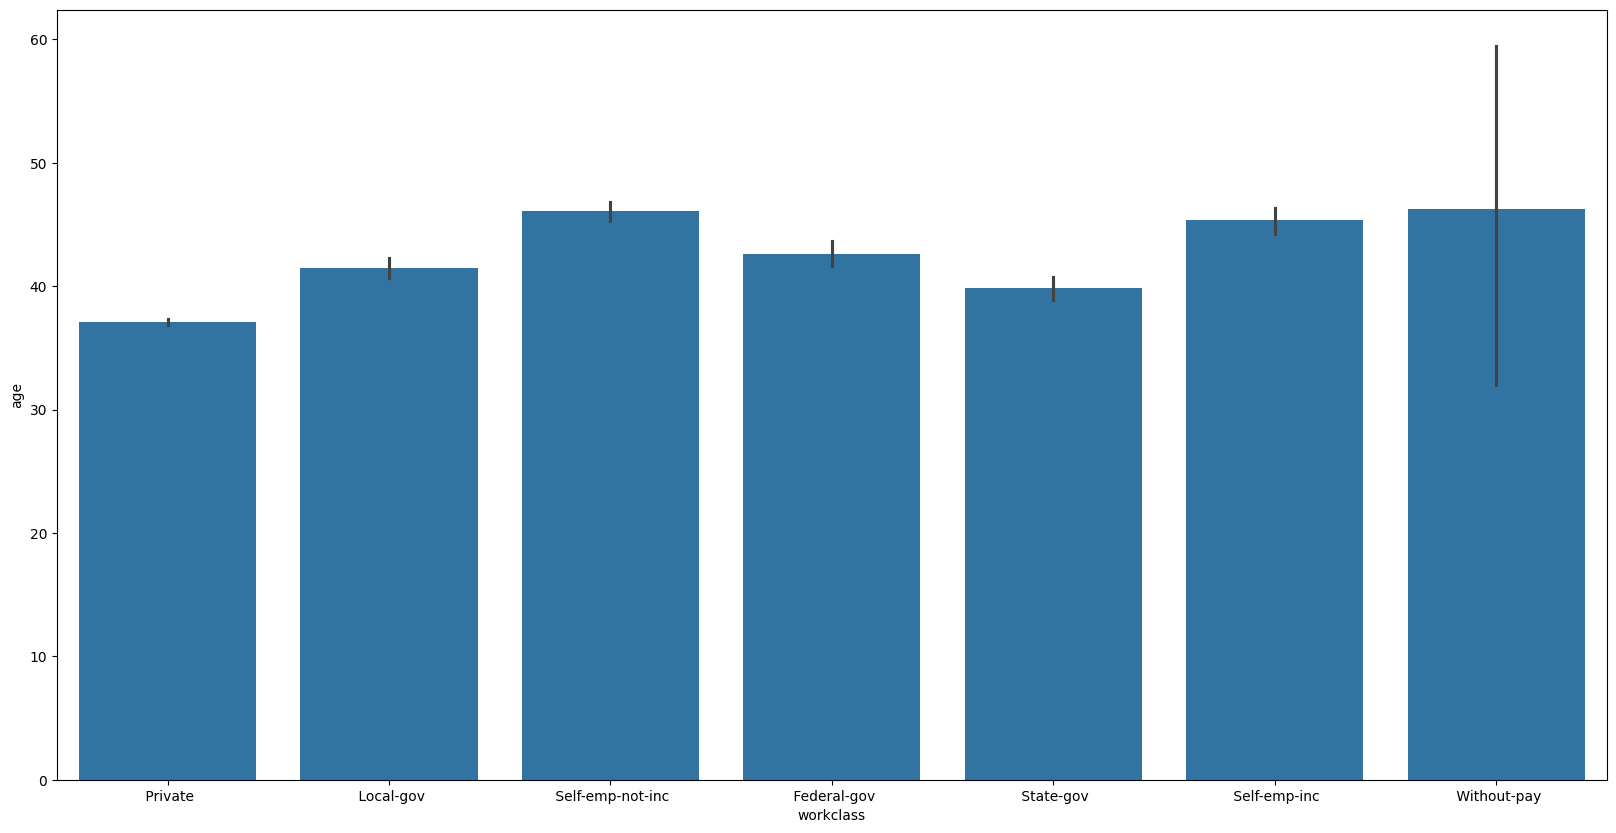

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x='workclass',y='age',data=salary_test)

<Axes: xlabel='Salary', ylabel='hoursperweek'>

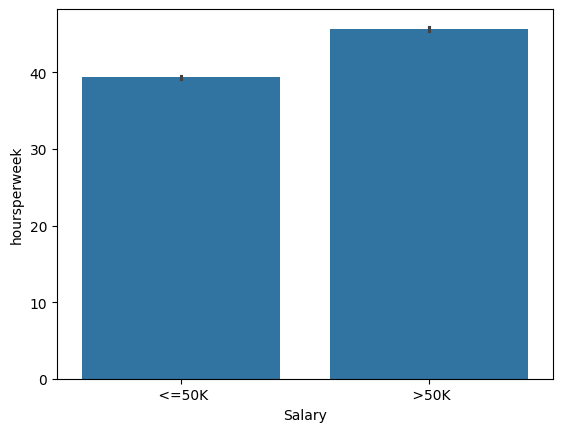

In [26]:
sns.barplot(x='Salary', y='hoursperweek', data=salary_train)

<Axes: xlabel='age', ylabel='Density'>

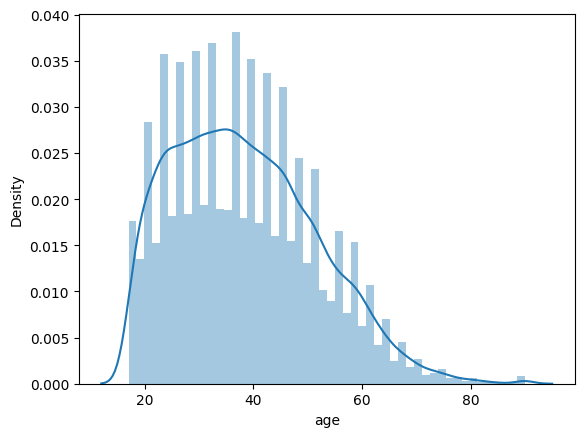

In [29]:
sns.distplot(salary_train['age'])

<Axes: xlabel='hoursperweek', ylabel='Density'>

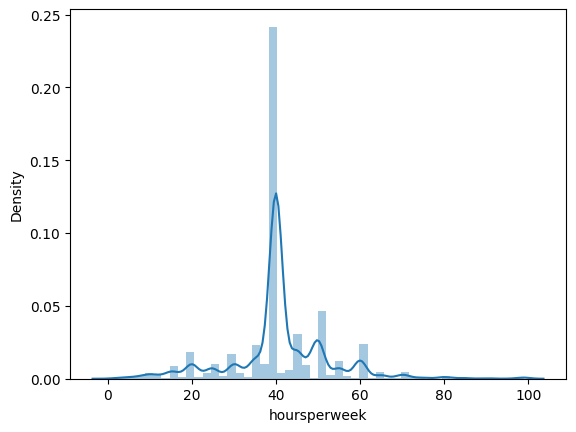

In [30]:
sns.distplot(salary_train['hoursperweek'])

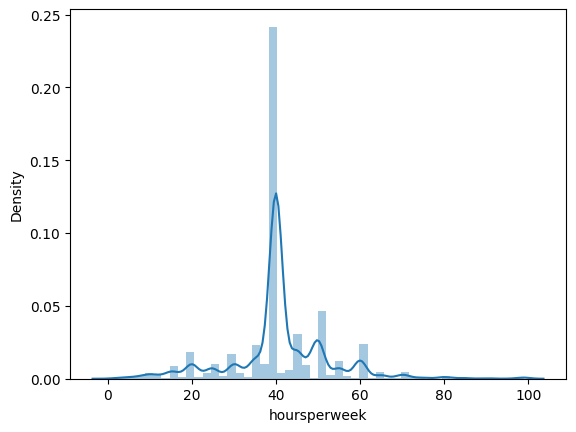

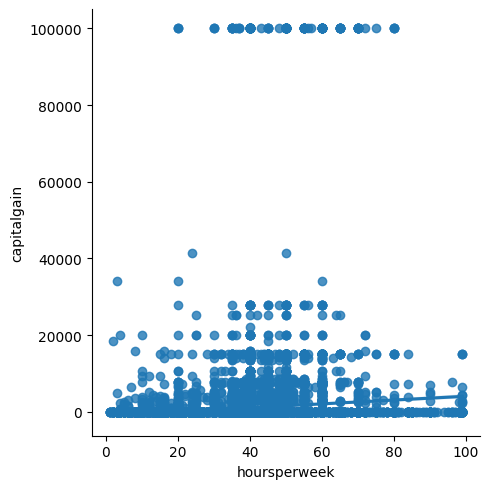

In [36]:
sns.distplot(salary_train['hoursperweek'])
sns.lmplot(y='capitalgain', x='hoursperweek',data=salary_train)
plt.show()

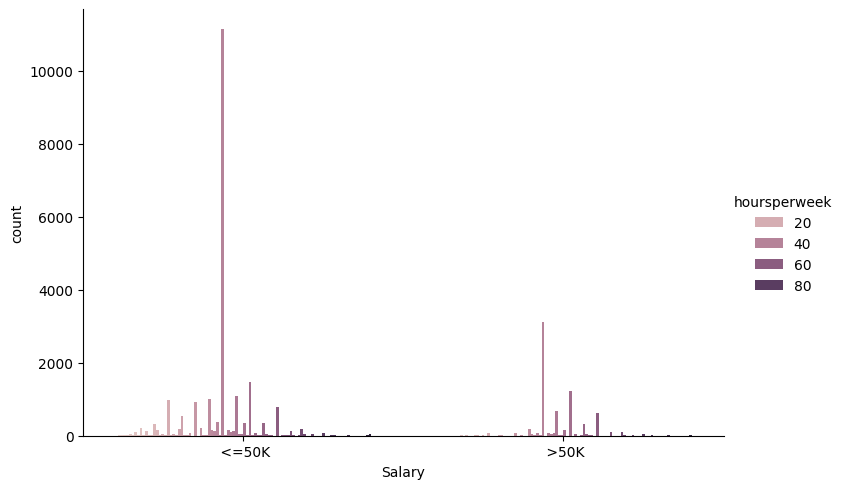

In [41]:
sns.catplot(x='Salary', hue='hoursperweek', data=salary_train, kind='count', aspect=1.5)

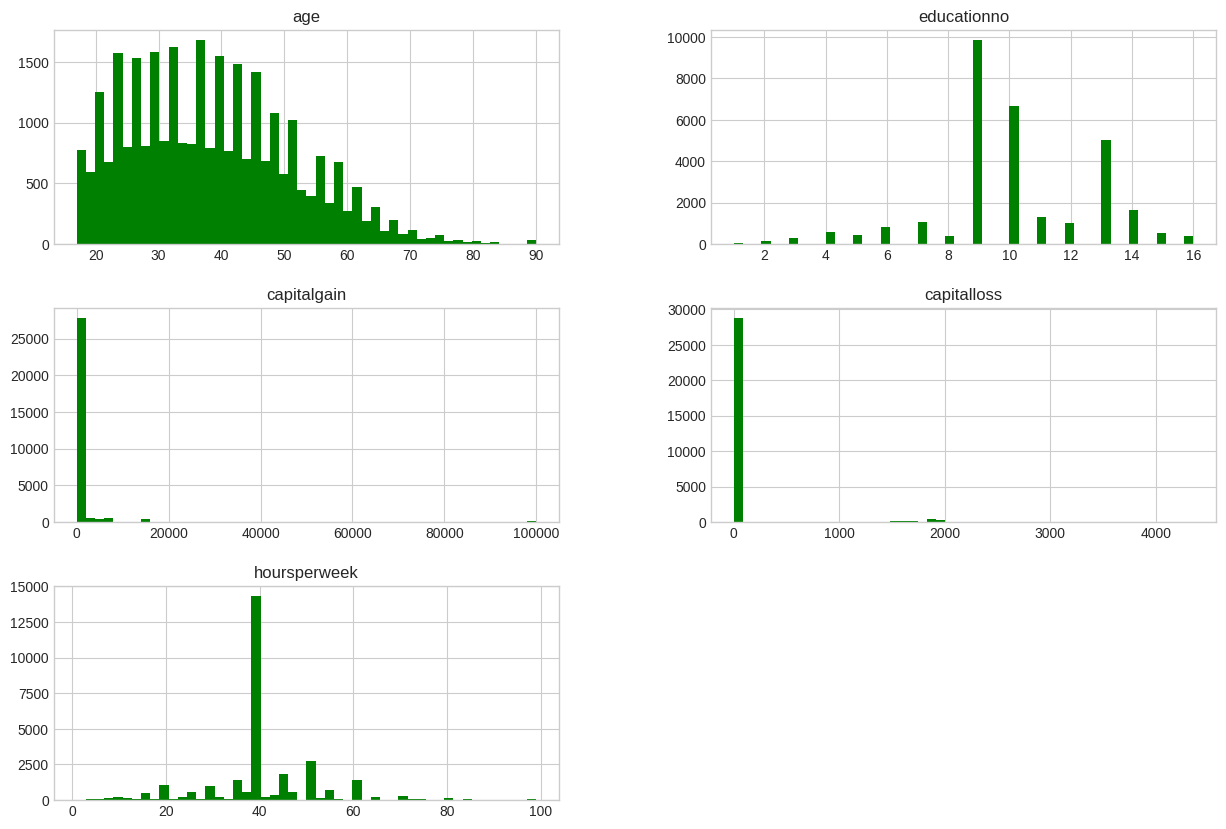

In [44]:
plt.style.use('seaborn-whitegrid')

salary_train.hist(bins=50, figsize=(15,10), color='green')
plt.show()

In [ ]:
# Data Preprocessing
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
for i in string_columns:
  salary_train[i] = label_encoder.fit_transform(salary_train[i])
  salary_test[i] = label_encoder.fit_transform(salary_test[i])

In [ ]:
salary_train.sample(10)

age  workclass  education  educationno  maritalstatus  occupation  \
20517   27          2         11            9              2           2   
20590   45          2         15           10              0          10   
366     34          2         11            9              4           7   
21536   19          2         11            9              4           5   
29610   24          2         11            9              4           6   
6563    52          1         15           10              0          13   
10988   34          0         15           10              0          10   
12900   29          2         15           10              2           7   
11601   43          1         11            9              0          10   
13172   42          2         11            9              0           6   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
20517             0     4    1            0            0            50   
20590             1     4    1            0            0            70   
366               1     4    0            0            0            35   
21536             3     4    1            0            0            20   
29610             4     2    0            0            0            40   
6563              1     4    0            0            0            40   
10988             3     4    1            0            0            72   
12900             0     4    1            0            0            40   
11601             4     4    0            0            0            40   
13172             1     2    0            0            0            40   

       native  Salary  
20517      37   <=50K  
20590      37   <=50K  
366        37   <=50K  
21536      37   <=50K  
29610      37   <=50K  
6563       37   <=50K  
10988      37   <=50K  
12900      37   <=50K  
11601      37   <=50K  
13172      37   <=50K

In [ ]:
X_train = salary_train.iloc[:,:-1]
X_train.sample()

age  workclass  education  educationno  maritalstatus  occupation  \
8575   52          2         11            9              2           3   

      relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
8575             0     4    1            0            0            40      37

In [ ]:
y_train = salary_train.iloc[:,-1]
y_train.sample()

8385     <=50K
Name: Salary, dtype: object

In [ ]:
X_test = salary_test.iloc[:,:-1]
X_test.sample()

age  workclass  education  educationno  maritalstatus  occupation  \
3178   50          2          9           13              2           9   

      relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
3178             0     4    1            0            0            50      37

In [ ]:
y_test = salary_test.iloc[:,-1]
y_test.sample()

12409     <=50K
Name: Salary, dtype: object

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
Gnbmodel = GaussianNB()

In [ ]:
# building model on train data and predicting for train data
train_pred_gau = Gnbmodel.fit(X_train, y_train).predict(X_train)
train_pred_gau

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [ ]:
# training accuracy
train_acc_gau = np.mean(train_pred_gau==y_train)
train_acc_gau

0.7953317197705646

In [ ]:
# building model on train data and predicting for test data'
test_pred_gau = Gnbmodel.fit(X_train, y_train).predict(X_test)
test_pred_gau

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [ ]:
# testing accuracy
test_acc_gau = np.mean(test_pred_gau==y_test)
test_acc_gau

0.7946879150066402

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
Mnbmodel = MultinomialNB()

In [ ]:
train_pred_multi = Mnbmodel.fit(X_train, y_train).predict(X_train)

In [ ]:
train_acc_multi = np.mean(train_pred_multi==y_train)
train_acc_multi

0.7729186698053778

In [ ]:
test_pred_multi = Mnbmodel.fit(X_train, y_train).predict(X_test)

In [ ]:
test_acc_multi = np.mean(test_pred_multi==y_test)
test_acc_multi

0.7749667994687915